In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, GlobalMaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import numpy as np
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
import skimage
from skimage import io
from skimage.io import imread_collection
import cv2
import os
import glob
from PIL import Image 
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import asarray
from numpy import save

from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random


In [6]:
folder = '#' #insert your own path

photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    if file.startswith('Italian') and file.endswith('.jpg'):
    # determine class
        output = 0.0
    elif file.startswith('Japanese') and file.endswith('.jpg'):
        output = 1.0
    # load image
    else:
        os.remove("desktop.ini")
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('italy_v_japan_photos2.npy', photos)
save('italy_v_japan_labels2.npy', labels)

(394, 200, 200, 3) (394,)


In [7]:
# load and confirm the shape
from numpy import load
photos = load('italy_v_japan_photos.npy')
labels = load('italy_v_japan_labels.npy')
print(photos.shape, labels.shape)

(100, 200, 200, 3) (100,)


In [9]:
# create directories
dataset_home = '#' path
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['Japanese/', 'Italian/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [11]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# define model
model = define_model()

# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = datagen.flow_from_directory('path',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('path',
    class_mode='binary', batch_size=64, target_size=(200, 200))

history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)

# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Found 314 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
> 92.500


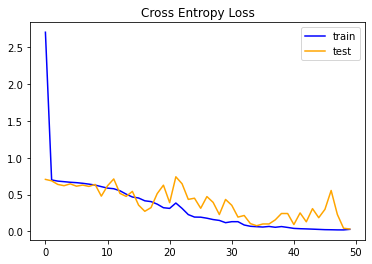

In [12]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()

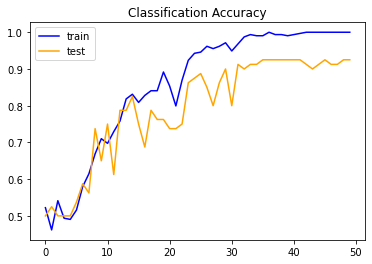

In [13]:
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()